# Aula2.Ex1. Explorando Pixeis e o Sistema `RGB`
Na Aula 2, sobre conceitos envolvidos na Computação Gráfica, vemos que podemos explorar imagens no "mundo" vetorial e matricial. 

Embora a modelagem de objetos geométricos seja muito mais adequada no mundo vetorial, temos que lidar com imagens matriciais no momento de exibição no dispositivo de saída (como um monitor). Na prática, no fim do do processo, é necessário realizar uma conversão matricial.

Neste exercício, exploraremos um pouco o conceito de pixel, que é importante para o mundo matricial.

Vimos que pixel é uma amostra de um ponto de imagem e que o tamanho da amostra está associado com a qualidade da imagem.

Vamos carregar uma imagem e explorar um pouco o sistema `RGB`.

## Carregar as bibliotecas necessárias para o exercício

In [2]:
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display # to display images

## Fazer o download de uma imagem da internet
Tente trocar a URL por uma imagem de sua preferência.

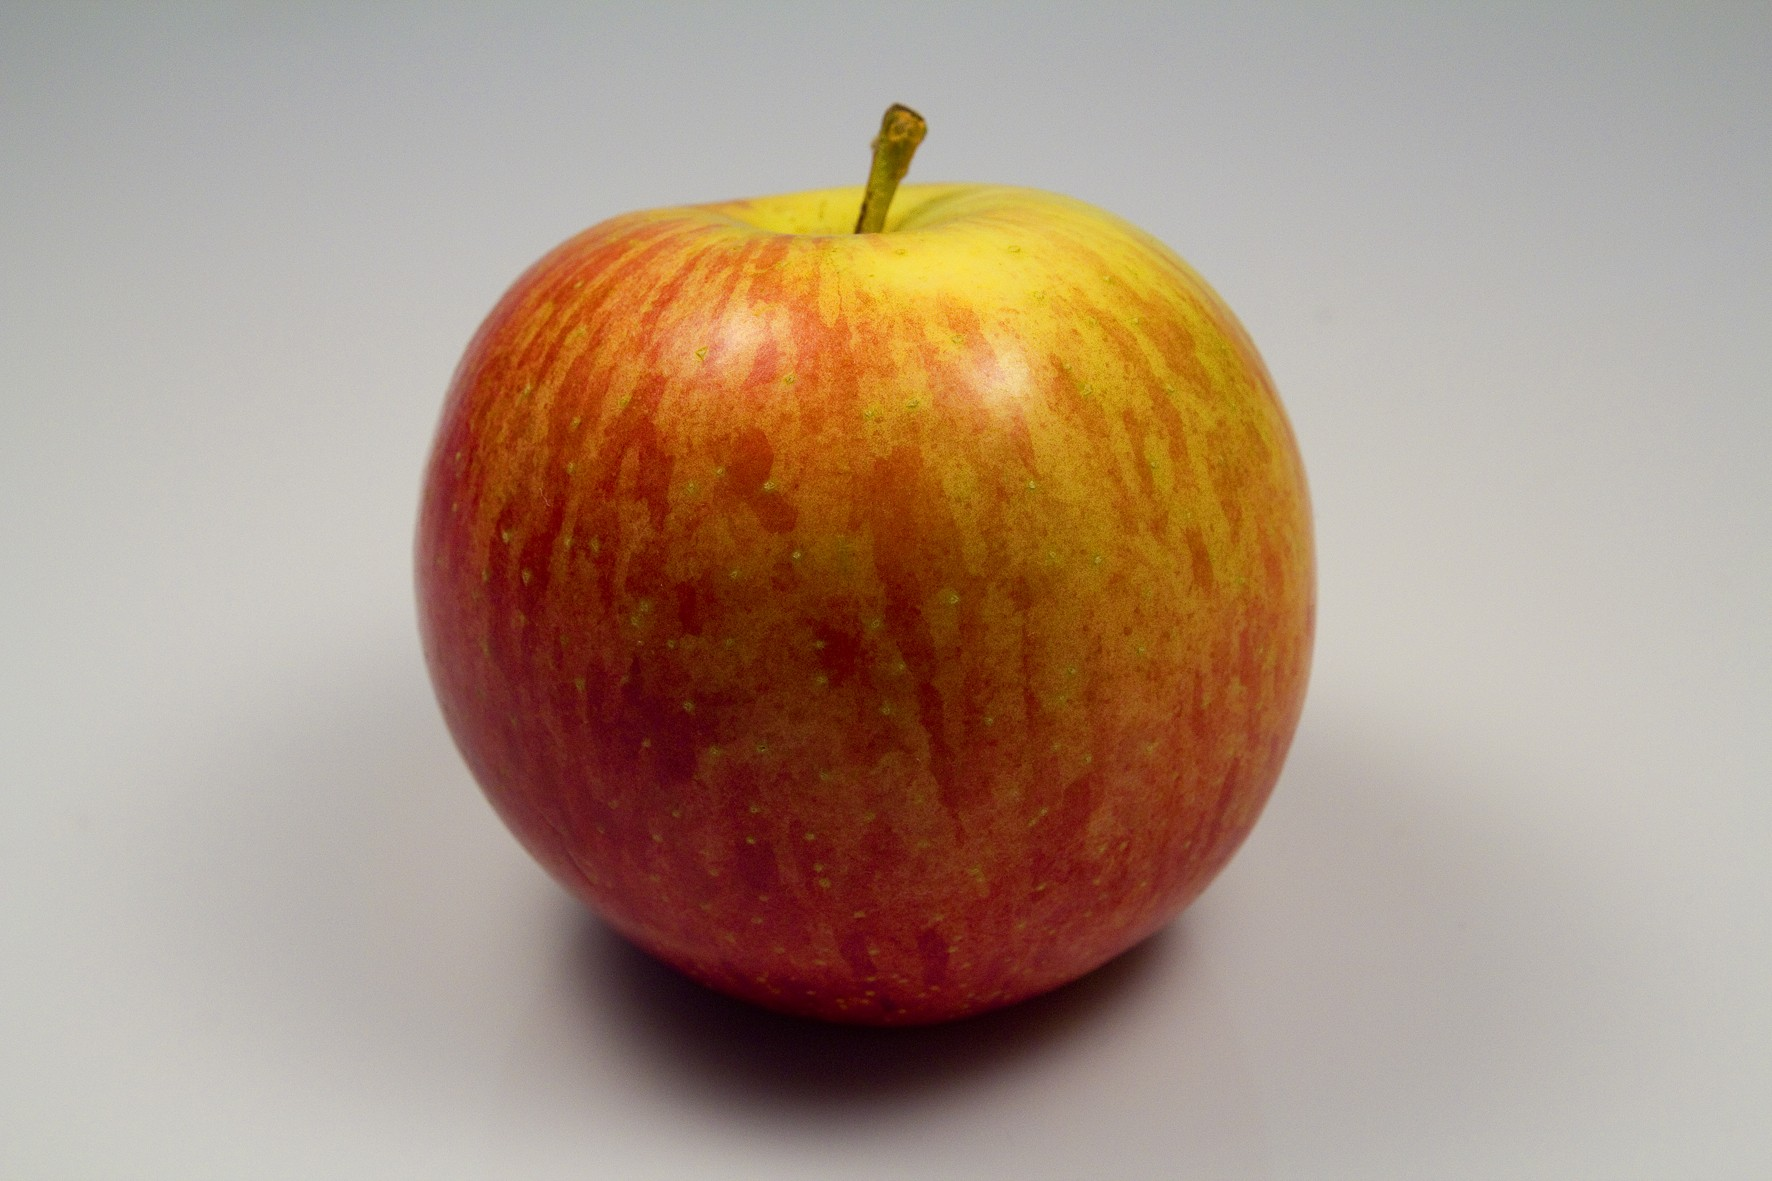

In [3]:
url_imagem = 'http://imagens.usp.br/wp-content/uploads/13072012frutasfotoMarcosSantos008.jpg'

# lendo a imagem
response = requests.get(url_imagem)
img = Image.open(BytesIO(response.content))

# exibindo a imagem
display(img)

## Explorando a matriz de pixeis da imagem
Vimos que a imagem é composta por uma matriz de pixeis. A dimensão dessa matriz representa a dimensão da imagem (largura e altura).

Cada pixel é composto pela tripla `RGB` (`R`=*Red*, `G`=*Green*, `B`=*Blue*). E cada componente possui uma escala de $0$ a $255$.

Desafio: percorrer a matriz de pixels e "clarear" o fundo da imagem. Para esse caso, o fundo da imagem é composto por pixels em tons de cinza. Toda vez que encontrarmos um pixel nesse tom, somamos um fator de "clareamento". É importante lembrar que quanto mais próximo de $255$, menor a intensidade da componente.

Regra de clareamento: se a componente `R` é maior do que $32$, então clarear o pixel (tente alterar a regra e observe o resultado).

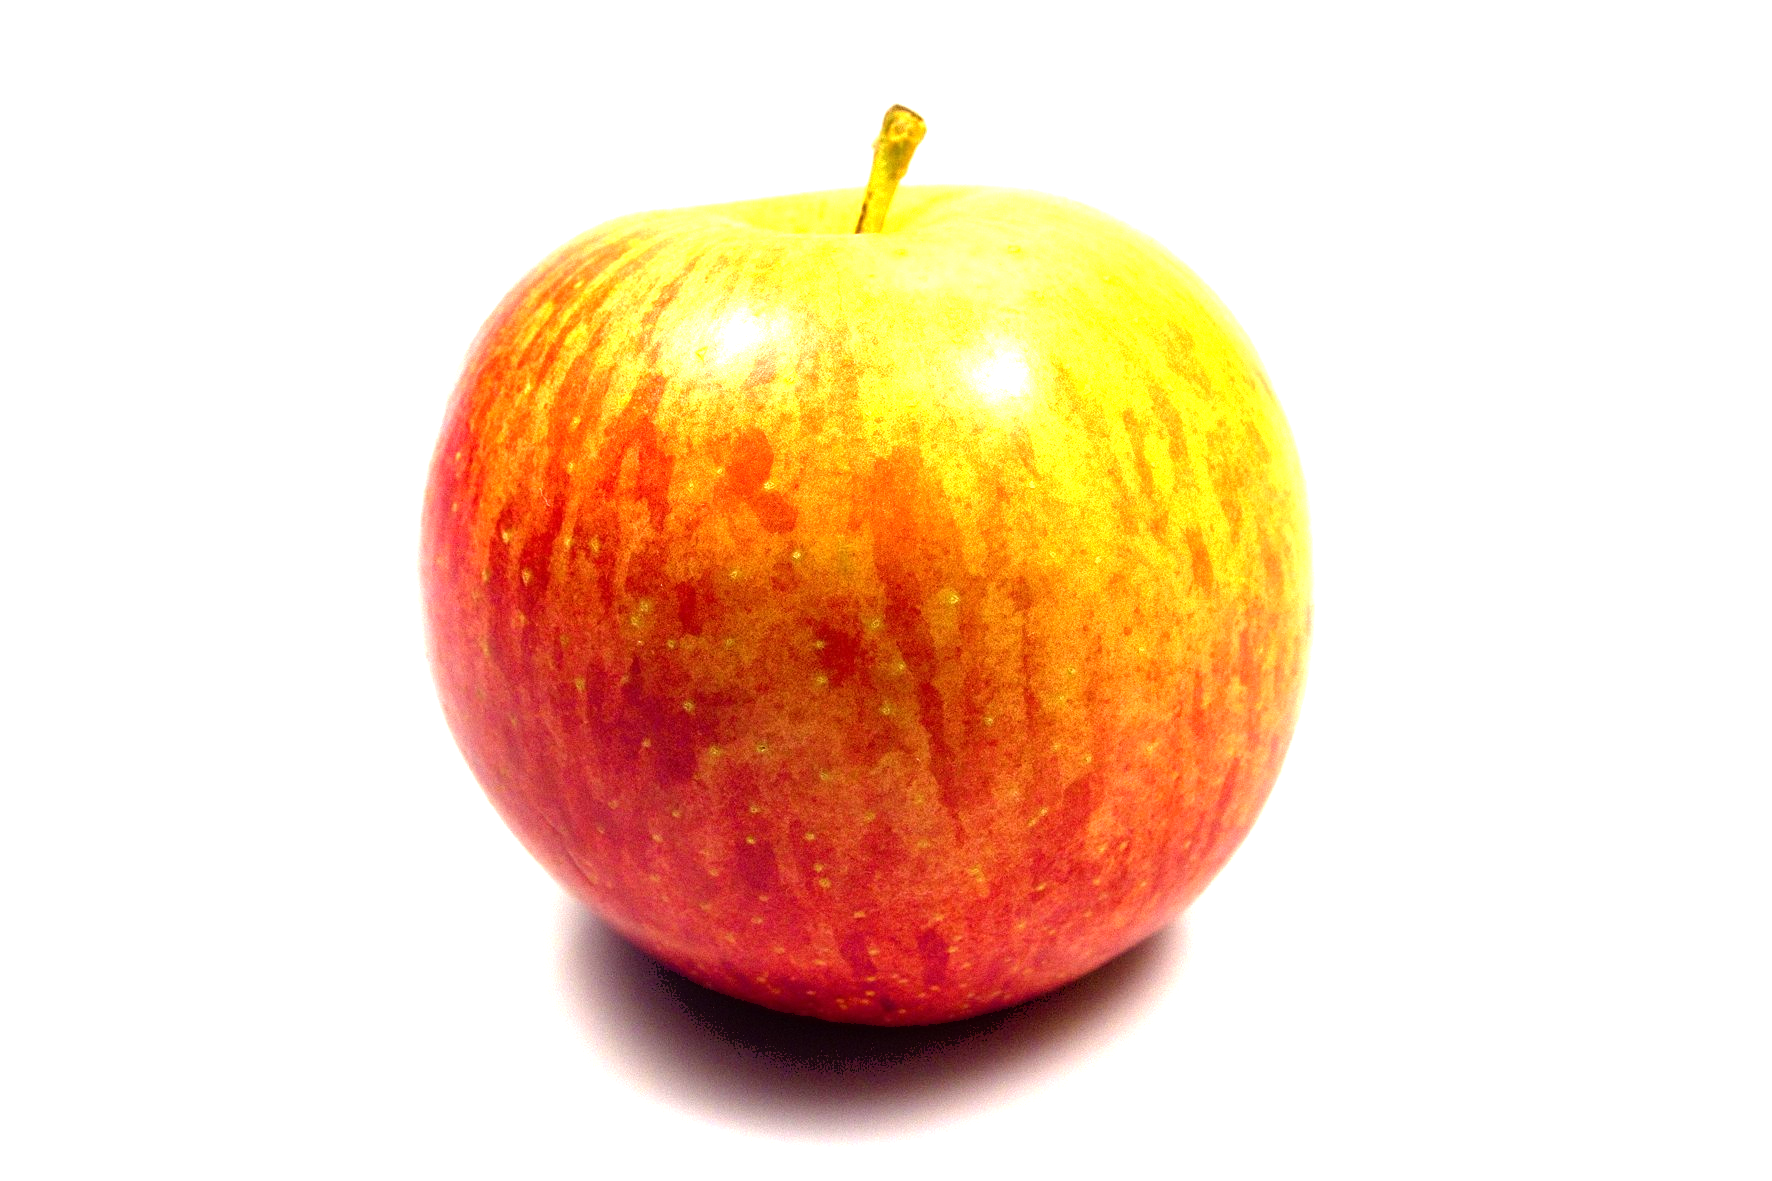

In [4]:
# informacoes da imagem
largura = img.size[0]
altura = img.size[1]

# obtem a matriz de pixeis da imagem
matrix_pixeis = img.load()

for i in range(largura):
    for j in range(altura):
        pixel = matrix_pixeis[i, j]  # tomamos o pixel na posicao i e j

        R = pixel[0]
        G = pixel[1]
        B = pixel[2]
        
        # Regra de clareamento: se a componente R é maior do que 32, então clarear o pixel (experimente ctiar outras)
        if R > 32:
            R = 2*R
            G = 2*G
            B = 2*B
        novo_pixel = (R, G, B)
        matrix_pixeis[i, j] = novo_pixel
        
# exibindo a imagem
display(img)

## Resultado
O resultado acima não ficou tão ruim, considerando que usamos uma regra tão simples. Tente melhorar a regra de clareamento. Tente adicionar novas regras. Consegue remover a sombra?

## Desafio para casa
Pense no sistema `RGB`, pesquise e verifique como deixar a imagem em tons de cinza. Na dúvida, procure seu monitor ou professor (depois de pesquisa).

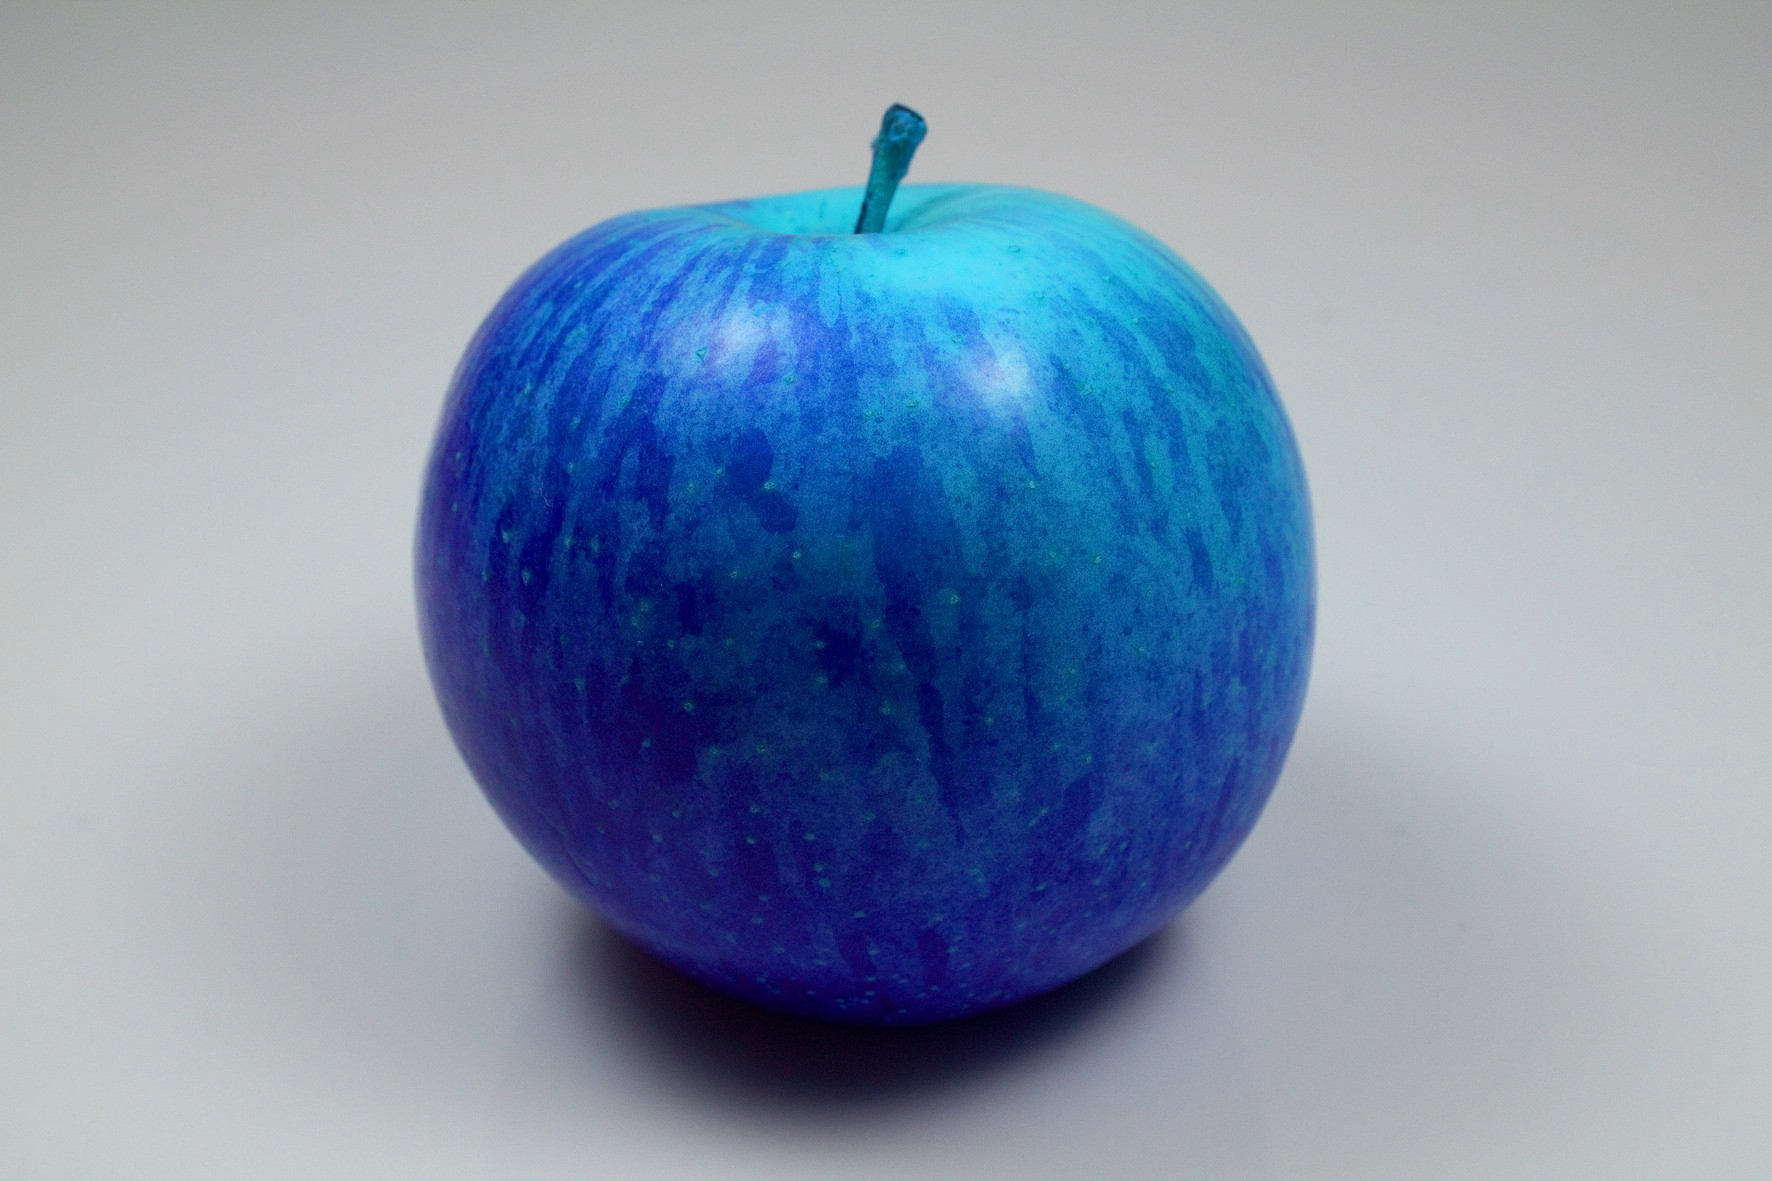

In [6]:
img = Image.open(BytesIO(response.content))
matrix_pixeis = img.load()
for i in range(largura):
    for j in range(altura):
        pixel = matrix_pixeis[i, j]
        R = pixel[0]
        G = pixel[1]
        B = pixel[2]
        if R > B:
            R, B = B, R
        novo_pixel = (R, G, B)
        matrix_pixeis[i, j] = novo_pixel
display(img)